In [1]:
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2

In [2]:
def AHE(im, win_size):
    
    win_size=int(win_size/2)
    output = np.zeros(np.shape(im))
    im = np.pad(im, win_size, 'symmetric')
    window = win_size * win_size
    param = 255/window
    for x in range(win_size, len(im)-win_size):
        for y in range(win_size, len(im[0])-win_size):
            rank = 0
            value = im[x][y]
            contextual_window = im[x-win_size:x+win_size+1, y-win_size: y+win_size+1]
            if value == 255:
                rank = (contextual_window == value).sum()
            else:
                rank = (contextual_window < value).sum()
            output[x-win_size][y-win_size] = rank*param
                
    return output     

In [3]:
A = Img.open('beach.png')
beach = np.asarray(A)
beach33 = AHE(beach[:], 33)
beach65 = AHE(beach[:], 65)
beach129 = AHE(beach[:], 129)

HE = cv2.imread('beach.png')
HES = cv2.cvtColor(HE, cv2.COLOR_BGR2GRAY)
cv2HE = cv2.equalizeHist(HES)

Text(0.5, 1.0, 'HE')

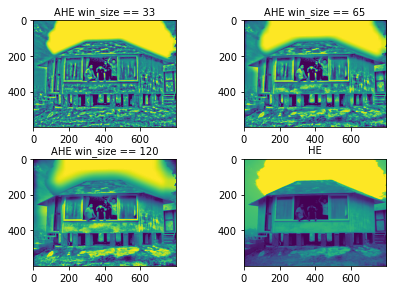

In [4]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
axs[0, 0].imshow(beach33)
axs[0, 0].set_title('AHE win_size == 33', fontsize=10)
axs[0, 1].imshow(beach65)
axs[0, 1].set_title('AHE win_size == 65', fontsize=10)
axs[1, 0].imshow(beach129)
axs[1, 0].set_title('AHE win_size == 120', fontsize=10)
axs[1, 1].imshow(cv2HE)
axs[1, 1].set_title('HE', fontsize=10)

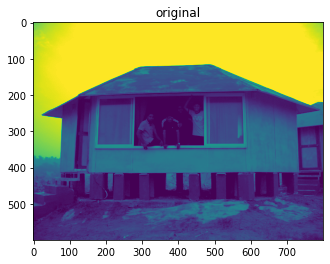

In [5]:
plt.title('original')
plt.imshow(beach)